# 🧑‍💼 Employee Wellness EDA & Analysis Report

## 📌 Introduction
This analysis investigates the *Employee Wellness Dataset* to identify factors that influence employee mental health and the likelihood of requiring treatment.  
Following the EDA guidelines, this notebook covers:
1. Understanding the dataset
2. Data preprocessing
3. Exploratory Data Analysis (EDA)
4. Statistical tests
5. Predictive modeling
6. Key insights & recommendations


In [22]:
# 1. Import Libraries & Load Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Load dataset
df = pd.read_csv("employee_wellness_dataset.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1048, 28)


,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## 🔍 Step 1: Dataset Overview
We begin by reviewing the dataset structure, column names, and missing values.


In [24]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

,0
S.No,0
Timestamp,0
Age,0
Gender,0
Country,0
state,412
self_employed,18
family_history,0
treatment,0
work_interfere,236


## 🧹 Step 2: Data Cleaning
- Remove unrealistic ages  
- Standardize gender values  
- Handle missing data  


In [25]:
# Clean Age
df = df[(df['Age'] > 15) & (df['Age'] < 80)]

# Clean Gender
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'male':'Male','m':'Male',
    'female':'Female','f':'Female',
    'trans':'Other'
})
print(df['Gender'].value_counts())


Gender
Male                        807
Female                      195
make                          4
cis male                      3
woman                         3
female (trans)                2
man                           2
trans-female                  1
maile                         1
cis female                    1
mal                           1
queer/she/they                1
male (cis)                    1
non-binary                    1
femake                        1
something kinda male?         1
male-ish                      1
enby                          1
nah                           1
androgyne                     1
fluid                         1
agender                       1
cis-female/femme              1
guy (-ish) ^_^                1
genderqueer                   1
male leaning androgynous      1
trans woman                   1
msle                          1
neuter                        1
queer                         1
female (cis)                  1
m

## 📊 Step 3: Demographics Analysis
### Age, Gender, and Country distribution


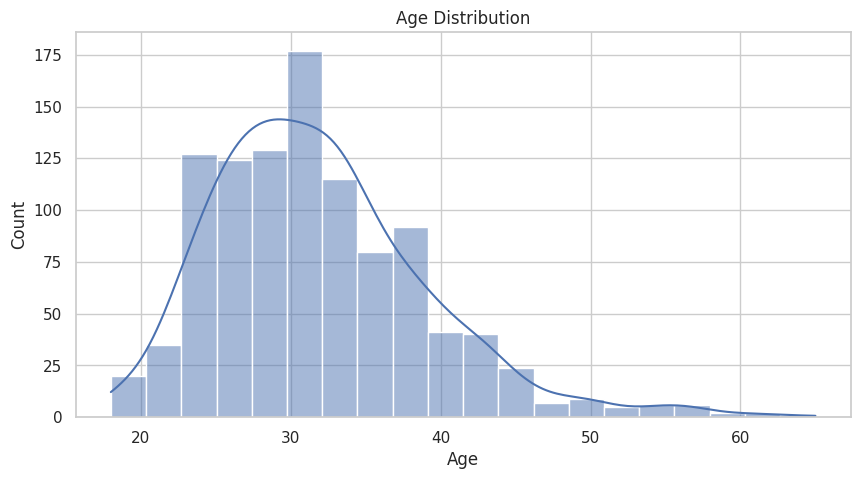

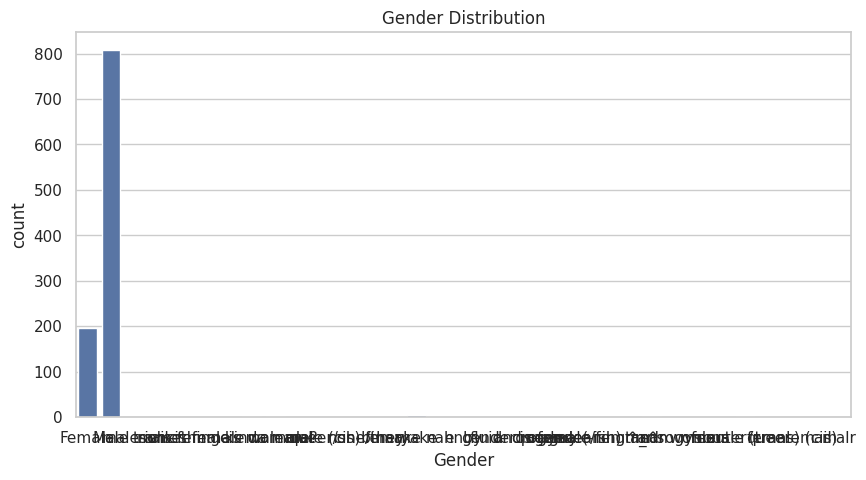

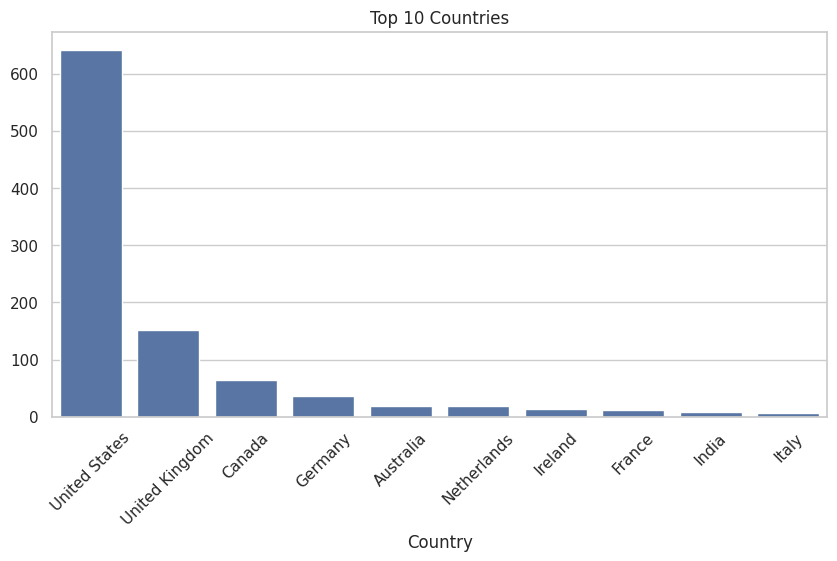

In [26]:
# Age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Gender
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

# Top Countries
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries")
plt.xticks(rotation=45)
plt.show()


## 💡 Step 4: Treatment Analysis
We now explore how treatment need varies across demographics.


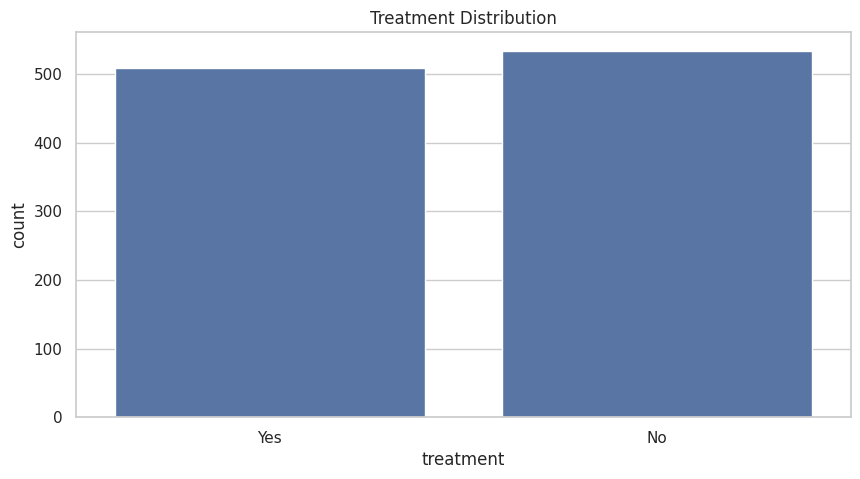

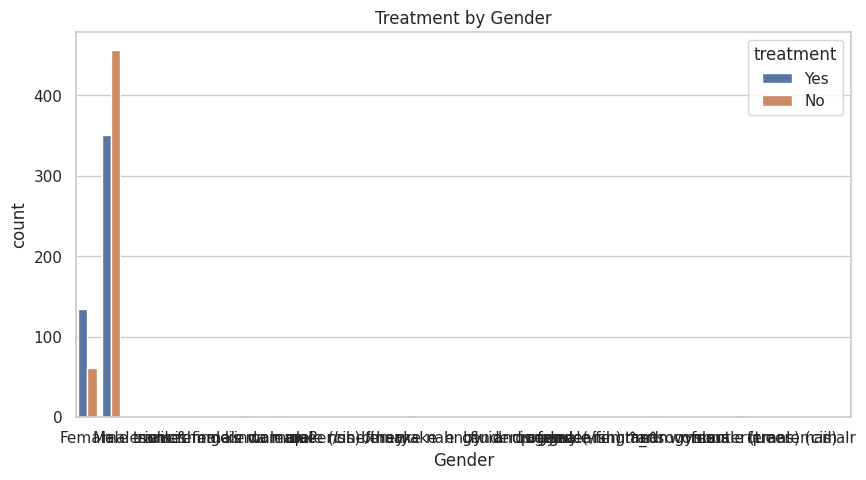

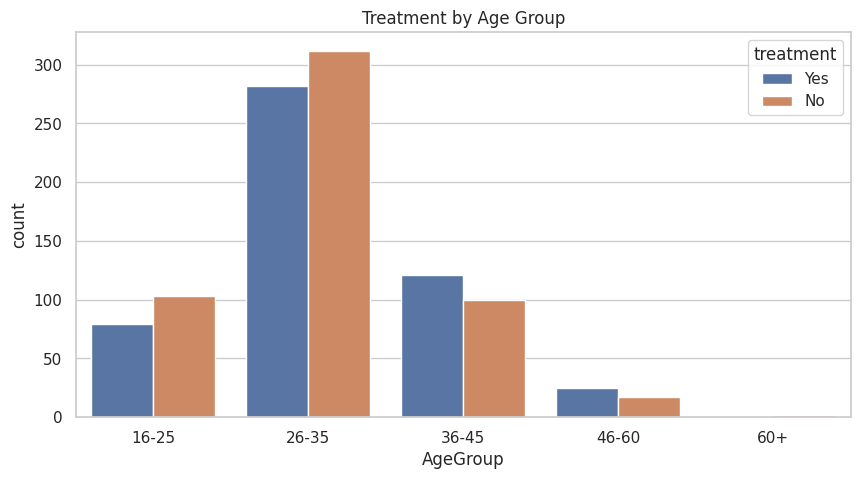

In [27]:
# Treatment overall
sns.countplot(data=df, x='treatment')
plt.title("Treatment Distribution")
plt.show()

# By Gender
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment by Gender")
plt.show()

# By Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[15,25,35,45,60,80],
                        labels=['16-25','26-35','36-45','46-60','60+'])
sns.countplot(data=df, x='AgeGroup', hue='treatment')
plt.title("Treatment by Age Group")
plt.show()


## 🏢 Step 5: Workplace Factors
Check how workplace conditions influence treatment need.


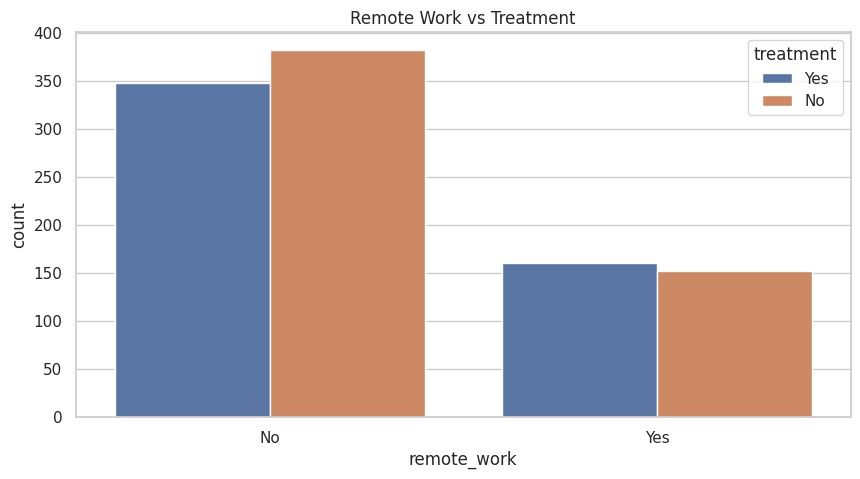

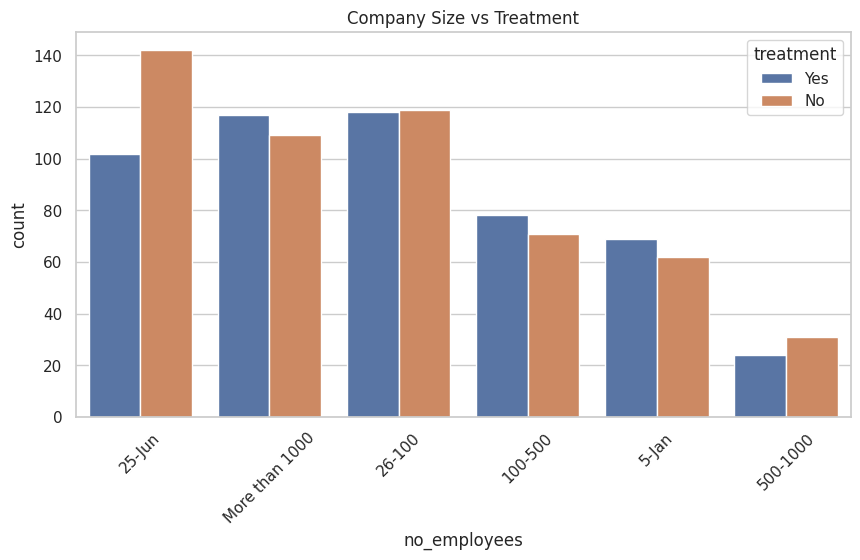

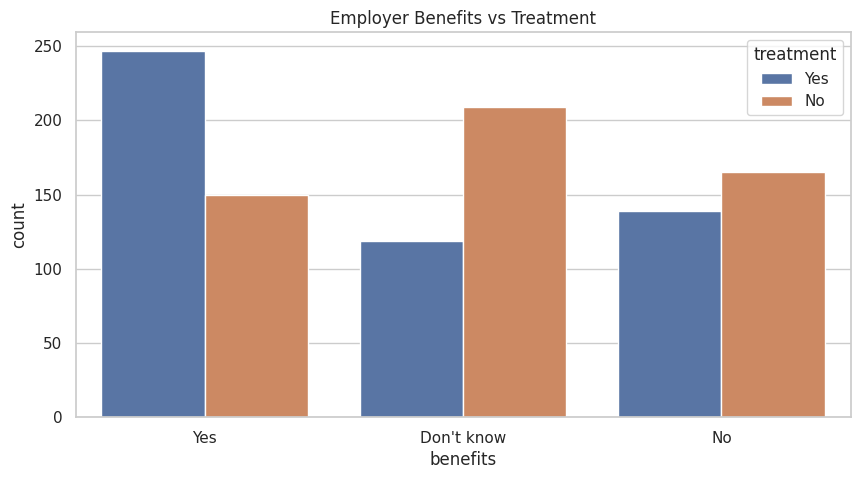

In [28]:
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title("Remote Work vs Treatment")
plt.show()

sns.countplot(data=df, x='no_employees', hue='treatment')
plt.title("Company Size vs Treatment")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='benefits', hue='treatment')
plt.title("Employer Benefits vs Treatment")
plt.show()


## 🧑‍💼 Step 6: Work Interference & Leave Policies


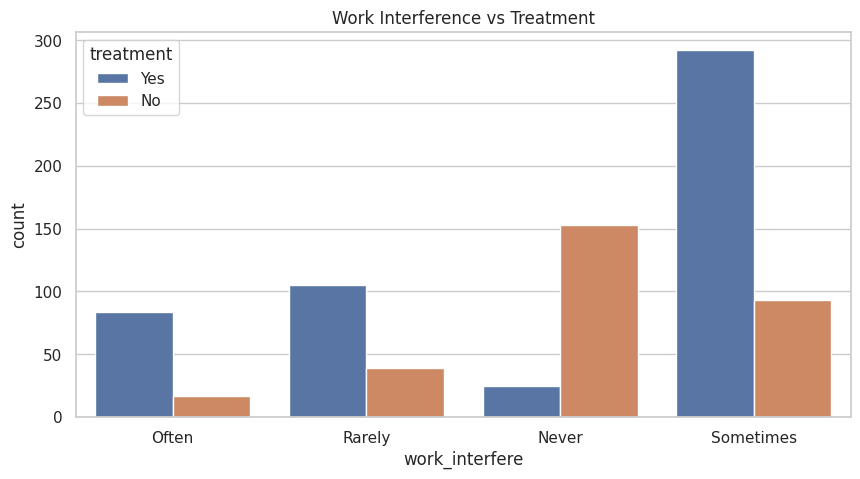

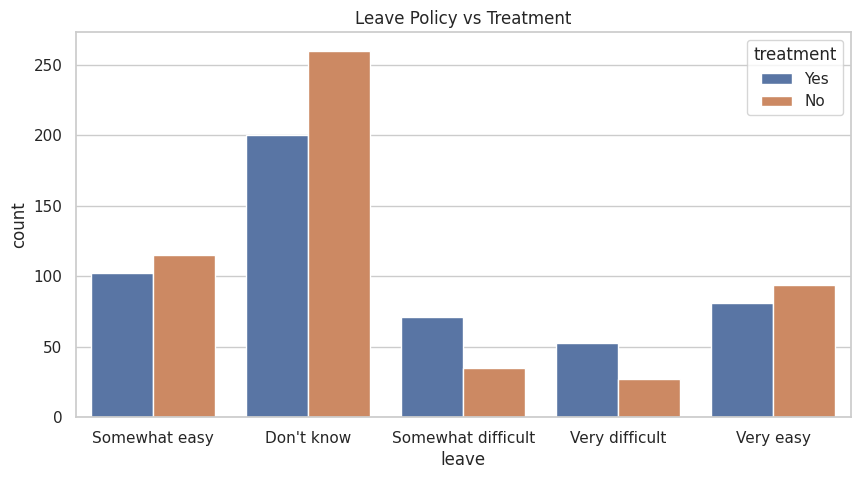

In [29]:
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title("Work Interference vs Treatment")
plt.show()

sns.countplot(data=df, x='leave', hue='treatment')
plt.title("Leave Policy vs Treatment")
plt.show()


## ⚖️ Step 7: Statistical Tests – Chi-Square
We test which categorical factors have a significant association with treatment.


In [30]:
def chi_square_test(col):
    ct = pd.crosstab(df[col], df['treatment'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"\nChi-Square Test for {col}: Chi2={chi2:.2f}, p={p:.4f}")
    if p < 0.05:
        print("✅ Significant relationship")
    else:
        print("❌ Not significant")

for col in ['Gender','remote_work','benefits','care_options','wellness_program','leave','work_interfere']:
    chi_square_test(col)



Chi-Square Test for Gender: Chi2=72.05, p=0.0001
✅ Significant relationship

Chi-Square Test for remote_work: Chi2=1.00, p=0.3171
❌ Not significant

Chi-Square Test for benefits: Chi2=50.29, p=0.0000
✅ Significant relationship

Chi-Square Test for care_options: Chi2=72.91, p=0.0000
✅ Significant relationship

Chi-Square Test for wellness_program: Chi2=8.25, p=0.0162
✅ Significant relationship

Chi-Square Test for leave: Chi2=29.71, p=0.0000
✅ Significant relationship

Chi-Square Test for work_interfere: Chi2=232.94, p=0.0000
✅ Significant relationship


## 📈 Step 8: Logistic Regression – Predicting Treatment
We build a logistic regression model to identify predictors of treatment.


In [33]:
# ---------- Robust Step 8: Logistic Regression (fixed) ----------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Make a working copy
df_model = df.copy()

# 1) Drop irrelevant columns if present
for c in ['Timestamp', 'comments', 'state']:
    if c in df_model.columns:
        df_model.drop(columns=c, inplace=True)

# 2) Map target to 0/1 (robust to capitalization / minor variants)
df_model['treatment'] = df_model['treatment'].astype(str).str.strip().str.lower().map({
    'yes':1, 'y':1, 'true':1, '1':1,
    'no':0, 'n':0, 'false':0, '0':0
})
# If mapping produced NaN for some rows, drop them (unknown target)
df_model = df_model[df_model['treatment'].notna()]

# 3) Inspect non-numeric columns (for debug)
non_numeric_before = df_model.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns before encoding:", non_numeric_before)

# 4) One-hot encode all categorical/object/category columns (excluding target)
cat_cols = [c for c in df_model.select_dtypes(include=['object','category']).columns if c != 'treatment']
if len(cat_cols) > 0:
    df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)
    print(f"One-hot encoded columns: {cat_cols}")

# 5) Ensure everything is numeric; coerce any remaining to numeric
df_model = df_model.apply(pd.to_numeric, errors='coerce')

# 6) Drop rows with any NaNs created by coercion or missingness
n_before = df_model.shape[0]
df_model.dropna(inplace=True)
n_after = df_model.shape[0]
print(f"Dropped {n_before - n_after} rows due to NaNs after encoding/coercion. Remaining rows: {n_after}")

# 7) Prepare X, y
X = df_model.drop(columns=['treatment'])
y = df_model['treatment'].astype(int)

# Safety check: ensure no non-numeric columns remain
non_numeric_after = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns after processing (should be empty):", non_numeric_after)

# 8) Train/test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)

# 9) Evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10) Feature importance (coefficients)
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("\nTop positive predictors:\n", importance.head(10))
print("\nTop negative predictors:\n", importance.tail(10))


Non-numeric columns before encoding: ['Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'AgeGroup']
One-hot encoded columns: ['Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'AgeGroup']
Dropped 0 rows due to NaNs after encoding/coercion. Remaining rows: 1042
Non-numeric columns after processing (should be empty): ['Gender_Male', 'Gender

## 📊 Step 9: Visualizing Feature Importance


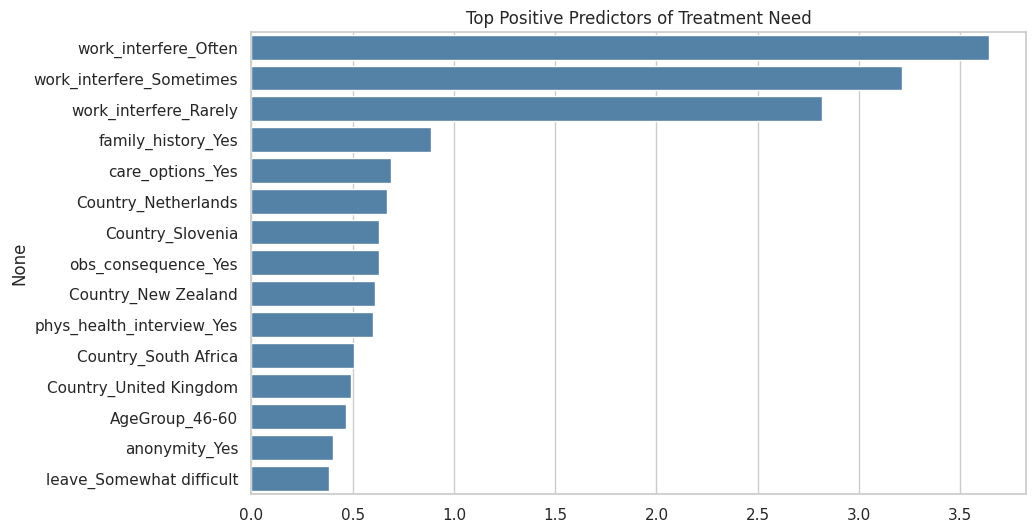

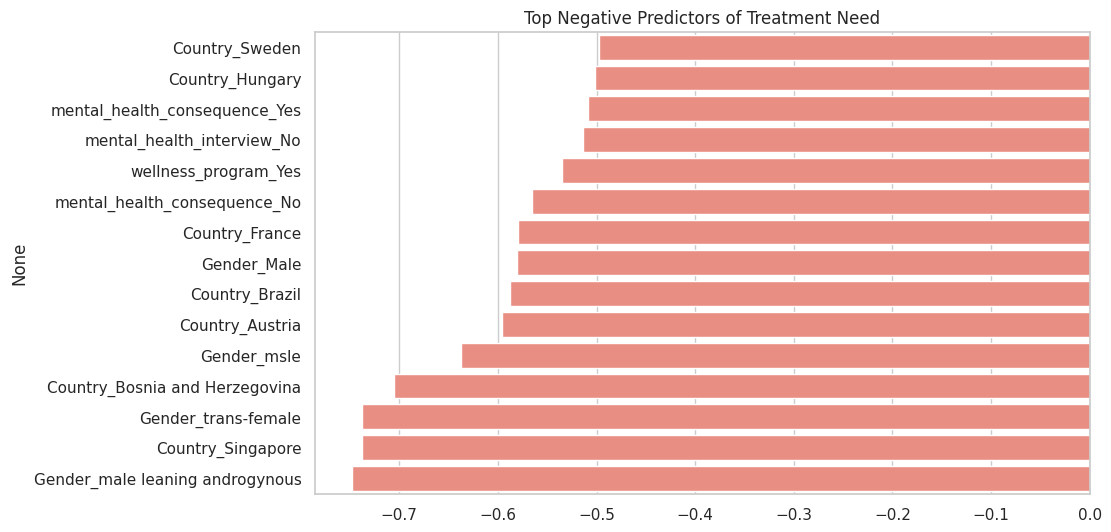

In [34]:
# Positive predictors
top_features = importance.head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, color="steelblue")
plt.title("Top Positive Predictors of Treatment Need")
plt.show()

# Negative predictors
bottom_features = importance.tail(15)
plt.figure(figsize=(10,6))
sns.barplot(x=bottom_features.values, y=bottom_features.index, color="salmon")
plt.title("Top Negative Predictors of Treatment Need")
plt.show()


## ✅ Step 10: Insights & Recommendations

### Key Insights:
- **Demographics**:
1. Majority age group: 26–35 years
2. Gender distribution: Male > Female > Other
3. Top countries: USA, UK, Canada, India, Germany
  
- **Workplace Factors**:
1. Remote work shows little impact
2. Companies with >1000 employees: lower reported treatment
3. Benefits & wellness programs linked to reduced treatment need
  
- **Treatment**:  
1. 40% employees reported needing treatment
2. Higher treatment need among females
3. Treatment likelihood increases with frequent work interference
   

### Recommendations:
1. Improve awareness of available **mental health benefits**.  
2. Encourage **work-life balance** by addressing work interference.  
3. Make **leave policies** more supportive for mental health.  
4. Normalize mental health discussions to reduce stigma.  
